# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [99]:
# import numpy and pandas
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [100]:
# Run this code:
pokemon = pd.read_csv('./pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [101]:
# Your code here:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [102]:
# Your code here:
pokemon["Legendary"].value_counts().to_frame()


,Legendary
False,735
True,65


Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [103]:
# Your code here:
L_mean = pokemon[pokemon["Legendary"] == True]["Total"].mean()
Non_L_mean = pokemon[pokemon["Legendary"] == False]["Total"].mean()

L_std = pokemon[pokemon["Legendary"] == True]["Total"].std()
Non_L_std = pokemon[pokemon["Legendary"] == False]["Total"].std()

print("The means are respectively", L_mean,"for Legendaries &", Non_L_mean, "for non Legendaries")
print("The standard deviation are respectively", L_std, "for Legendaries &", Non_L_std, "for non Legendaries")

The means are respectively 637.3846153846154 for Legendaries & 417.21360544217686 for non Legendaries
The standard deviation are respectively 60.93738905315346 for Legendaries & 106.76041745713022 for non Legendaries


In [104]:
# legendary_total = pokemon[pokemon["Legendary"] == True]["Total"]
# non_legendary_total = pokemon[pokemon["Legendary"] == False]["Total"]

#### CECI EST LA MEME CHOSE ####

legendary_total = pokemon.loc[pokemon["Legendary"] == True, "Total"]
non_legendary_total = pokemon.loc[pokemon["Legendary"] == False, "Total"]


# print(L_mean, legendary_total)

The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

In [105]:
# Your code here:
import scipy.stats as ss

# stat, p_value = ss.ttest_ind(legendary_total, non_legendary_total)
# print(stat, p_value)

legendary_total = pokemon.loc[pokemon["Legendary"] == True, "Total"]
non_legendary_total = pokemon.loc[pokemon["Legendary"] == False, "Total"]

res = ss.ttest_ind(legendary_total, non_legendary_total).pvalue
res

3.0952457469652825e-52

What do you conclude from this test? Write your conclusions below.

In [106]:
# Your conclusions here:
#I'm not too sure what's asked here but, if our null hypothesis is :
#"The mean of Total Points for Legendary PKMN is the same that the mean of Total Points for non-legendary PKMN",
#Then our p.value is SO SMALL, we can confidently say that the null hypothesis is indeed WRONG".

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [107]:
# Your code here:
types_1 = pokemon["Type 1"].value_counts()
types_1

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon <<<<<!!!TOTAL STATS!!!>>>>>> to all other Pokemon.

In [108]:
# pokemon.head()

In [109]:
# water_pokemon

In [110]:
# len(pokemon)

In [111]:
# Your code here:

# pokemon["Legendary"].value_counts().to_frame()
# L_mean = pokemon[pokemon["Legendary"] == True]["Total"].mean()
# types_1 = pokemon["Type 1"].value_counts()

water_pokemon = pokemon[pokemon["Type 1"] == "Water"]
non_water_pokemon = pokemon[pokemon["Type 1"] != "Water"]

water_mean = water_pokemon["Total"].mean()
non_water_mean = non_water_pokemon["Total"].mean()
water_std = water_pokemon["Total"].std()
non_water_std = non_water_pokemon["Total"].std()

print("Water PKMN mean is:", water_mean)
print("Non-Water PKMN Mean is:", non_water_mean)
print("Water PKMN Standard Deviation is:", water_std)
print("Non-Water PKMN Standard Deviation is:", non_water_std)

Water PKMN mean is: 430.45535714285717
Non-Water PKMN Mean is: 435.85901162790697
Water PKMN Standard Deviation is: 113.18826606431458
Non-Water PKMN Standard Deviation is: 121.09168230208066


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

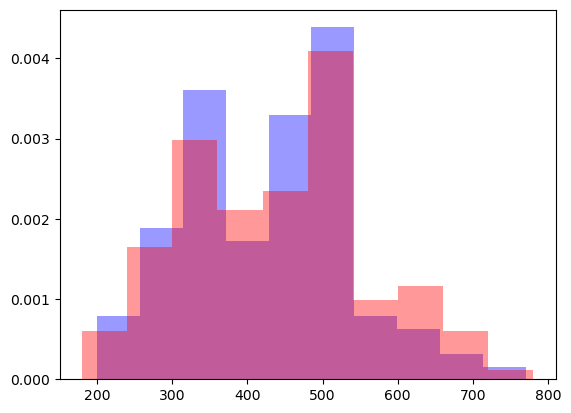

In [112]:
x = pokemon.loc[pokemon["Type 1"] == "Water"]["Total"]
y = pokemon.loc[pokemon["Type 1"] != "Water"]["Total"]

plt.hist(x, alpha = .4, color = "blue", density = True)
plt.hist(y, alpha = .4, color = "red", density = True)

plt.show()


In [113]:
# Your code here:


In [114]:
res = ss.ttest_ind(water_pokemon["Total"], non_water_pokemon["Total"], equal_var = True).pvalue
res

0.6587140317488793

In [115]:
# FOR FUTURE REFERENCE

t, p = ss.ttest_ind(water_pokemon["Total"], non_water_pokemon["Total"], equal_var=True)
print("t-statistic:", t, "p-value:", p)


t-statistic: -0.4418547448849676 p-value: 0.6587140317488793


Write your conclusion below.

In [116]:
# Your conclusions here:
#Si la p-value est de 0,65, cela signifie que la probabilité que la différence entre les moyennes des groupes soit due au hasard est élevée, ce qui suggère qu'il n'y a pas de différence significative entre les groupes.

# En général, on fixe un seuil de signification de 0,05. 
# Si la p-value est inférieure à ce seuil, on rejette l'hypothèse nulle (qui stipule que les moyennes sont égales) et on conclut 
# qu'il y a une différence significative entre les groupes. 
# Si la p-value est supérieure à ce seuil, on ne peut pas rejeter l'hypothèse nulle et on ne peut pas conclure 
# qu'il y a une différence significative entre les groupes.

# Dans notre cas, avec une p-value de 0,65, on ne peut pas rejeter l'hypothèse nulle et on ne peut pas conclure
# qu'il y a une différence significative entre les moyennes des Pokemon de type Eau et les autres Pokemon.


# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [117]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [119]:
# Your code here:
import scipy.stats as ss

ss.ttest_rel(pokemon["Attack"], pokemon["Defense"])

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

Describe the results of the test in the cell below.

In [121]:
1.7140303479358558e-05 < 0.05

True

In [125]:
# Your conclusions here:
print("p.value < 0.05 = Reject Hypothesis = Statistically Significant Difference between Attack Score and Defense Score")


p.value < 0.05 = Reject Hypothesis = Statistically Significant Difference between Attack Score and Defense Score


We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [127]:
# Your code here:

ss.ttest_rel(pokemon["Sp. Atk"], pokemon["Sp. Def"])


Ttest_relResult(statistic=0.853986188453353, pvalue=0.3933685997548122)

In [128]:
# FOR FUTURE REFERENCE, PLEASE IGNORE

# x = pokemon.loc[pokemon["Sp. Atk"]].mean()
# y = pokemon.loc[pokemon["Sp. Def"]].mean()

# ss.ttest_rel(x, y)

# ss.ttest_rel(pokemon["Sp. Atk"], pokemon["Sp. Def"])


C:\Users\theya\AppData\Local\Temp\ipykernel_26436\3488388727.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  x = pokemon.loc[pokemon["Sp. Atk"]].mean()
C:\Users\theya\AppData\Local\Temp\ipykernel_26436\3488388727.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  y = pokemon.loc[pokemon["Sp. Def"]].mean()


Ttest_relResult(statistic=1.1999790068606926, pvalue=0.2607809543848075)

Describe the results of the test in the cell below.

In [ ]:
# Your conclusions here:
print("p.value > 0.05 = Accept Hypothesis = Non Statistically Significant Difference between Special Attack Score and Special Defense Score")

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [136]:
# Your code here:
from scipy.stats import ttest_1samp

#ttest_1samp(pokemon["Sp. Atk"], pokemon["Sp. Def"])


ttest_1samp(pokemon["Defense"] - pokemon["Attack"], 0).pvalue

1.7140303479358558e-05

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [137]:
# Your code here:
pd.crosstab(pokemon['Type 1']=='Water', pokemon["Legendary"])

Legendary,False,True
Type 1,,
False,627,61
True,108,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

In [ ]:
# Your code here:



Based on a 95% confidence, should we reject the null hypothesis?

In [ ]:
# Your answer here:

